In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
def get_st_res(log_file='minmin8_resnet18.log',num_epochs=60):
    nat_accu,rob_accu,loss,accu_on_train,train_loss =[],[],[],[],[]

    with open(log_file,encoding='utf-8',mode='r') as f:
        res_lines = f.readlines()
        
        test_res=[]
        train_res=[]
        for i,line in enumerate(res_lines):
            line = line.split(' ')
            #print(line)
            if len(line)>2:
                if line[2]=='====================Eval':
                    test_res.append(res_lines[i+1].split('\t'))
                    train_res.append(res_lines[i-1].split('\t'))
        train_res=train_res[:num_epochs]
        test_res=test_res[:num_epochs]
        

        for i in range(num_epochs):
            #print(i)
            nat_accu.append(float(test_res[i][3][8:]))
            rob_accu.append(float(test_res[i][-2][10:]))
            loss.append(float(test_res[i][7][9:]))
            accu_on_train.append(float(train_res[i][3][8:]))
            train_loss.append(float(train_res[i][5][9:]))


    res={'nat_accu':nat_accu,'rob_accu':rob_accu,'loss':loss,'accu_on_train':accu_on_train,'train_loss':train_loss}
    return res

In [8]:
num_epochs=120
advin = get_st_res('logs/cifar100_advin_resnet18_madrys.log',num_epochs=num_epochs)
tom = get_st_res('logs/cifar100_tom32_resnet18_madrys.log',num_epochs=num_epochs)
minmin = get_st_res('logs/cifar100_minmin_resnet18_madrys.log',num_epochs=num_epochs)
clean = get_st_res('logs/cifar100_clean_resnet18_madrys.log',num_epochs=num_epochs)

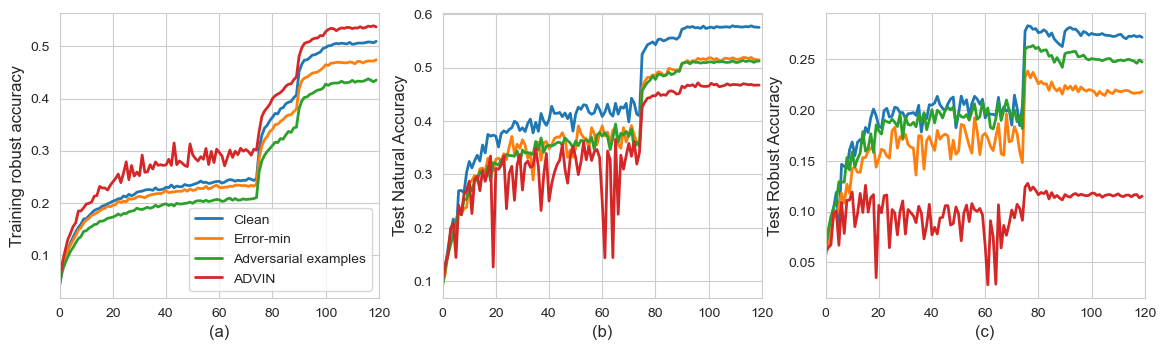

In [12]:
plt.figure(figsize=(14,3.7))
sns.set_style("whitegrid")
label_size=12
legend_size=10

plt.subplot(1,3,1)

df=pd.DataFrame(data={
    "epoch":range(num_epochs),
    'clean':clean['accu_on_train'],
    'min-min':minmin['accu_on_train'],
    'tom':tom['accu_on_train'],
    "advin":advin['accu_on_train']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
ax.legend(['Clean','Error-min','Adversarial examples','ADVIN'], loc='lower right',fontsize=legend_size)
ax.set_xlabel('(a)',fontsize=label_size)
ax.set_ylabel('Training robust accuracy',fontsize=label_size)

ax.set_xlim([0,num_epochs])
#ax.set_ylim([0,2.5])

#plt.title('(a)',y=-0.25)



plt.subplot(1, 3, 2)

df=pd.DataFrame(data={
    "epoch":range(num_epochs),
    'clean':clean['nat_accu'],
    'min-min':minmin['nat_accu'],
    'tom':tom['nat_accu'],
    "advin":advin['nat_accu']
})

sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
#ax.legend(['FromScratch','Pretrain','Clean'], loc='upper right',fontsize=legend_size)
ax.get_legend().remove()

ax.set_xlabel('(b)',fontsize=label_size)
ax.set_ylabel('Test Natural Accuracy',fontsize=label_size)
ax.set_xlim([0,num_epochs])
#ax.set_ylim([0.3,0.9])

#plt.title('(b)',y=-0.25)



plt.subplot(1, 3, 3)

df=pd.DataFrame(data={
    "epoch":range(num_epochs),
    'clean':clean['rob_accu'],
    'min-min':minmin['rob_accu'],
    'tom':tom['rob_accu'],
    "advin":advin['rob_accu']
})
sns.lineplot(data=pd.melt(df, ['epoch']), x='epoch', y='value', hue='variable',lw=2)
ax = plt.gca()
#ax.legend(['FromScratch','Pretrain','Clean'], loc='upper right',fontsize=legend_size)
ax.get_legend().remove()

ax.set_xlabel('(c)',fontsize=label_size)
ax.set_ylabel('Test Robust Accuracy',fontsize=label_size)

ax.set_xlim([0,num_epochs])
#ax.set_ylim([0,0.6])

#plt.title('(c)',y=-0.25)




plt.savefig('figures/cifar100_baselines_train_vs_test.pdf', bbox_inches='tight',  pad_inches = 0)
plt.show()

